C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\654502206.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\654502206.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\654502206.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * secon

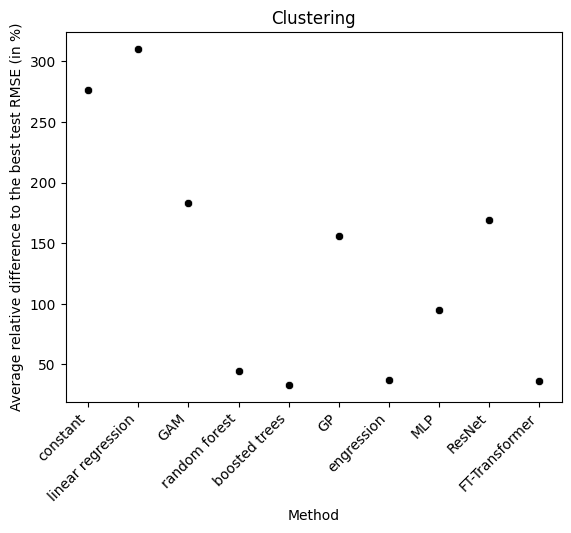

In [48]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3283358256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3283358256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3283358256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * se

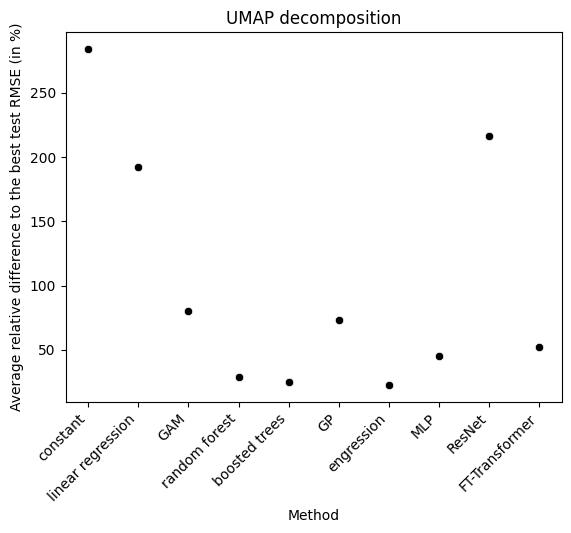

In [49]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [50]:
df

,361072,361073,361074,361076,361077,361078,361079,361080,361081,361082,361083,361084,361085,361086,361087,361088,361279,361280,361281
Method,,,,,,,,,,,,,,,,,,,
constant,1.371742,16.691483,2.293480,0.216008,1.547820,1.139587,0.501860,4.246838,10.581107,1.169448,0.333601,1.423642,1.068350,7.675744,2.012459,1.099288,0.051802,0.488261,0.023717
MLP,0.262303,0.556598,0.000000,0.044623,0.106582,0.740741,0.181061,0.115392,2.542459,0.039223,0.154714,1.381691,1.555949,0.348144,0.212969,0.222514,0.051132,0.003557,0.021970
ResNet,0.947215,17.033485,0.177157,0.201767,0.158137,0.504877,0.227912,3.692997,10.749829,0.141016,0.310801,1.053887,0.361075,3.196856,1.440973,0.397157,0.411096,0.097751,0.025130
FTTrans,0.208917,0.000000,0.060272,0.048480,1.545627,0.081057,0.137005,0.086699,0.000000,0.026314,0.202554,5.589837,1.436682,0.269346,0.000000,0.093936,0.044875,0.055787,0.019938
boosted_trees,1.183711,0.940085,0.093400,0.064280,0.000000,0.000000,0.075866,0.015606,0.676995,0.000000,0.035713,0.000000,1.156417,0.183831,0.029468,0.123928,0.009232,0.070311,0.017161
rf,1.329814,1.339567,0.436022,0.026818,0.055462,0.052521,0.000000,0.020991,1.232824,0.005803,0.000000,0.146077,0.117077,0.436468,0.117425,0.070575,0.027122,0.032900,0.013707
linear_regression,0.963512,13.263097,0.385691,0.055907,0.099639,0.412344,1.104853,0.060533,9.664354,0.614870,0.168251,3.101642,0.623753,4.803560,0.745583,0.313107,0.092800,0.037600,0.022603
engression,1.070669,0.359691,0.002069,0.000000,0.025359,0.260226,0.032925,0.008912,1.329466,0.011964,0.192657,0.047024,0.452748,0.143470,0.034885,0.254091,0.049600,0.005484,0.024482
GAM,0.648327,7.501236,0.169630,0.095636,0.080180,1.512499,1.870560,0.015543,NaN,0.025697,0.189101,1.151504,1.076550,0.000000,0.012181,0.000000,0.065605,0.013224,0.012177


C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\629777465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\629777465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\629777465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * secon

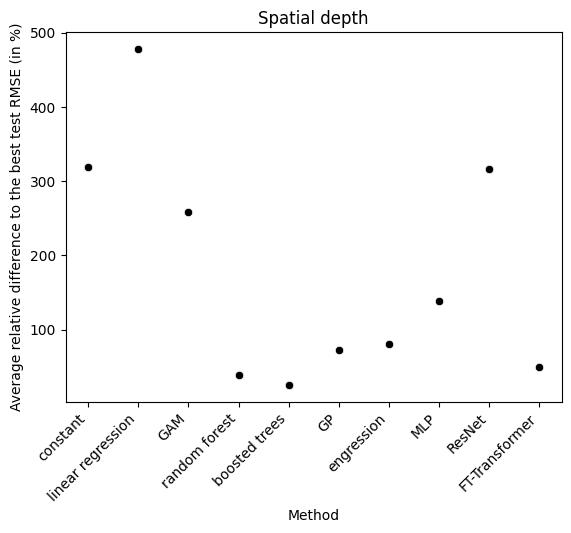

In [51]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [52]:
df

,361072,361073,361074,361076,361077,361078,361079,361080,361081,361082,361083,361085,361086,361087,361088,361279,361280,361281
Method,,,,,,,,,,,,,,,,,,
constant,7.585151,23.538122,3.491000,0.261340,1.789174,1.463946,0.167027,3.887634,4.109911,1.081857,0.513231,0.803757,4.837310,2.200424,0.878363,0.012329,0.737688,0.018980
MLP,8.723304,0.234153,0.147514,0.161445,0.046805,0.882995,0.092413,3.787910,8.270272,0.000000,0.545559,0.000000,0.956271,0.158796,0.054348,0.009997,0.792882,0.019747
ResNet,5.275964,12.261217,1.973573,0.154547,1.058271,0.888225,0.099821,1.140658,26.343506,0.742465,0.318998,0.530360,3.764332,1.818075,0.310295,0.105168,0.160277,0.017458
FTTrans,0.061972,0.000000,0.277583,0.012493,4.534298,0.119251,0.152991,0.875907,0.485112,0.013145,0.085663,0.048808,2.038806,0.134561,0.111014,0.011337,0.000000,0.010962
boosted_trees,0.000000,2.489847,0.696422,0.000000,0.065289,0.000000,0.000000,0.011566,0.000000,0.015476,0.022659,0.186234,0.837804,0.094136,0.011168,0.001750,0.112658,0.001421
rf,0.187706,3.265068,1.280611,0.005587,0.239984,0.060730,0.037178,0.014231,0.175175,0.043655,0.000000,0.170299,0.877058,0.385393,0.000000,0.022146,0.097040,0.000000
linear_regression,15.698171,30.348576,0.940898,0.034900,0.127703,0.845690,0.429206,0.929403,27.023648,0.614351,0.460206,0.515655,4.908070,0.839091,0.166350,2.091406,0.079273,0.011348
engression,5.608792,0.037425,0.000000,0.028524,0.000000,0.682372,0.076937,0.478666,2.619708,0.013355,0.175150,0.084747,1.088467,0.189658,0.170855,3.105927,0.014519,0.035777
GAM,1.927041,23.643212,0.220095,0.023953,0.088970,0.590413,0.130172,0.884355,6.621239,0.023847,0.265684,0.025502,0.000000,0.000000,0.306871,11.689587,0.087173,0.005573


C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\996620441.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\996620441.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\996620441.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * secon

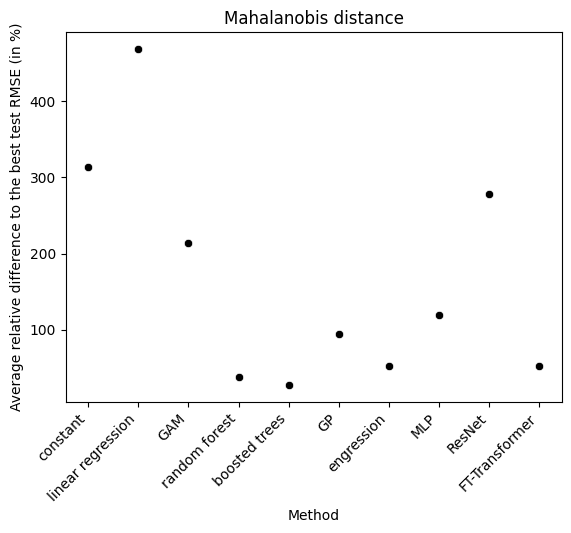

In [53]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        second_largest = sorted(rmse, reverse=True)[1]
        rmse[rmse > 5 * second_largest] = np.nan
        lowest_rmse = rmse.min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [54]:
df

,361072,361073,361074,361076,361077,361078,361079,361080,361081,361082,361083,361085,361086,361087,361088,361279,361280,361281
Method,,,,,,,,,,,,,,,,,,
constant,6.681976,22.889160,3.422821,0.276882,1.816382,1.507170,0.186590,3.960811,3.906221,1.080731,0.508461,0.728896,5.036034,2.415631,0.957534,0.013318,0.959009,0.018995
MLP,1.212032,0.151909,0.000000,0.280691,0.045938,0.437632,0.187378,1.776682,13.761097,0.038021,0.656243,0.305722,1.774000,0.528443,0.083564,0.014245,0.300252,0.016921
ResNet,6.031758,11.173568,1.447670,0.217000,9.414048,0.568258,0.132189,1.806274,11.814962,0.587951,0.482232,0.297746,3.439797,1.643302,0.268370,0.658064,0.178804,0.017984
FTTrans,0.062829,0.038799,3.424470,0.000000,4.257897,0.156794,0.085877,0.203387,0.093311,0.066651,0.047368,0.017597,0.704110,0.166174,0.046096,0.016438,0.079003,0.016904
boosted_trees,0.000000,2.617389,0.693576,0.018265,0.118802,0.000000,0.000000,0.077694,0.000000,0.000000,0.033160,0.092118,0.975301,0.000000,0.015243,0.121392,0.158741,0.005644
rf,0.080612,3.070558,1.258627,0.026714,0.259290,0.065863,0.058224,0.040826,0.122422,0.064635,0.000000,0.113181,0.962121,0.518794,0.016284,0.029932,0.206703,0.000000
linear_regression,14.334094,30.031234,0.936175,0.057012,0.130252,0.870389,0.456068,0.845135,26.361102,0.634841,0.457720,0.458787,5.191691,0.962986,0.211440,2.193975,0.196858,0.012077
engression,1.490484,0.000000,0.033495,0.078323,0.000000,0.856757,0.080461,0.243442,5.089162,0.005178,0.269630,0.029937,0.329158,0.242799,0.000000,0.692605,0.000000,0.037773
GAM,2.036141,23.414200,0.187824,0.046715,NaN,0.699920,0.156457,0.642069,6.165035,0.041967,0.247072,0.000000,0.000000,0.069596,0.376273,NaN,0.158643,0.005114


C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3783621533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3783621533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * second_largest] = np.nan
C:\Users\dalma\AppData\Local\Temp\ipykernel_5608\3783621533.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmse[rmse > 5 * se

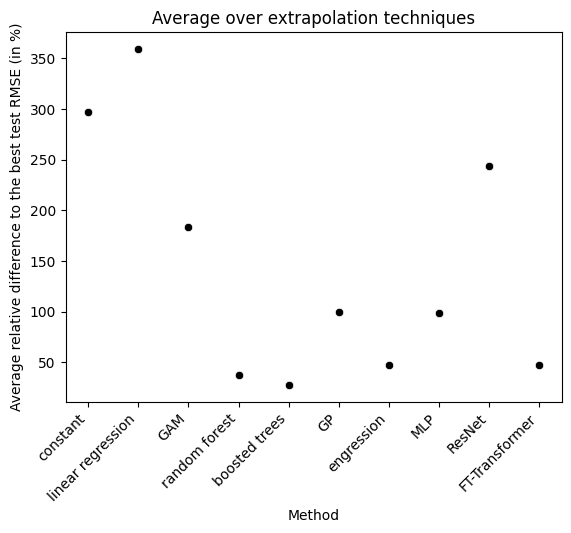

In [55]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            rmse = table['RMSE']
            second_largest = sorted(rmse, reverse=True)[1]
            rmse[rmse > 5 * second_largest] = np.nan
            lowest_rmse = rmse.min()
            df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'GP', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [56]:
df

,361072_clustering_RMSE_results.csv,361073_clustering_RMSE_results.csv,361074_clustering_RMSE_results.csv,361076_clustering_RMSE_results.csv,361077_clustering_RMSE_results.csv,361078_clustering_RMSE_results.csv,361079_clustering_RMSE_results.csv,361080_clustering_RMSE_results.csv,361081_clustering_RMSE_results.csv,361082_clustering_RMSE_results.csv,...,361081_mahalanobis_RMSE_results.csv,361082_mahalanobis_RMSE_results.csv,361083_mahalanobis_RMSE_results.csv,361085_mahalanobis_RMSE_results.csv,361086_mahalanobis_RMSE_results.csv,361087_mahalanobis_RMSE_results.csv,361088_mahalanobis_RMSE_results.csv,361279_mahalanobis_RMSE_results.csv,361280_mahalanobis_RMSE_results.csv,361281_mahalanobis_RMSE_results.csv
Method,,,,,,,,,,,,,,,,,,,,,
constant,5.376636,17.923715,3.850291,0.234187,2.085602,1.789260,0.218441,4.222199,5.288894,0.688430,...,3.906221,1.080731,0.508461,0.728896,5.036034,2.415631,0.957534,0.013318,0.959009,0.018995
MLP,1.324329,0.481682,0.000000,0.103191,0.596832,1.289479,0.114546,1.680887,9.969858,0.303605,...,13.761097,0.038021,0.656243,0.305722,1.774000,0.528443,0.083564,0.014245,0.300252,0.016921
ResNet,5.180641,10.998280,1.700552,0.091339,1.751964,0.790784,0.174372,0.847353,1.356105,1.280658,...,11.814962,0.587951,0.482232,0.297746,3.439797,1.643302,0.268370,0.658064,0.178804,0.017984
FTTrans,1.232353,0.000000,0.232196,0.122503,2.452481,0.161163,0.285142,0.200671,0.000000,0.030579,...,0.093311,0.066651,0.047368,0.017597,0.704110,0.166174,0.046096,0.016438,0.079003,0.016904
boosted_trees,0.000000,3.662788,0.985489,0.073873,0.289560,0.000000,0.000000,0.000000,0.192738,0.000000,...,0.000000,0.000000,0.033160,0.092118,0.975301,0.000000,0.015243,0.121392,0.158741,0.005644
rf,0.134604,4.516757,1.383189,0.097327,0.329095,0.113481,0.039528,0.029876,0.443252,0.097375,...,0.122422,0.064635,0.000000,0.113181,0.962121,0.518794,0.016284,0.029932,0.206703,0.000000
linear_regression,18.694206,16.610831,1.578010,0.002669,0.155332,0.883206,0.558079,1.034291,13.391653,0.798573,...,26.361102,0.634841,0.457720,0.458787,5.191691,0.962986,0.211440,2.193975,0.196858,0.012077
engression,1.311664,0.331089,0.068075,0.012484,0.000000,0.301808,0.111702,0.529531,2.689662,0.025973,...,5.089162,0.005178,0.269630,0.029937,0.329158,0.242799,0.000000,0.692605,0.000000,0.037773
GAM,1.308288,20.198806,0.330494,0.000000,0.400551,0.430531,0.248248,2.020141,8.774828,0.046696,...,6.165035,0.041967,0.247072,0.000000,0.000000,0.069596,0.376273,NaN,0.158643,0.005114
